# Методы машинного обучения. 


## ЛР5. – Классификатор на базе многослойного персептрона.
Осуществить генерацию исходных данных, которые представляют собой двумерное признаковое пространство, сгруппированное в 6 или более областей, отнесенных не менее чем к 4 классам (Пример взаимного расположения представлен на рисунке 1). В каждой области содержится не менее 50 примеров, и данные распределены по нормальному закону распределения. 
Необходимо:
- Визуализировать сгенерированные данные на плоскости.
- Для  сгенерированного датасета осуществить построение классификатор на базе многослойного персептрона. 
- Обосновать выбор числа слоев и нейронов в каждом слое. 
- В процессе обучения визуализировать разделяющие поверхности промежуточного слоя. 
- В процессе обучения построить графики изменения среднеквадратических ошибок на обучающей и тестовой  выборках. Обосновать момент остановки процесса обучения.
- Оценить точность, полноту, F-меру. Построить матрицу ошибок.
- Предусмотреть дополнительную возможность ввода пользователем новых, не входящих в сгенерированный датасет данных. Визуализировать их совместно с обучающей выборкой и разделяющими поверхностями, осуществить их классификацию.  

Рисунок 1. Пример взаимного расположения 6 областей относящихся к 4 классам.
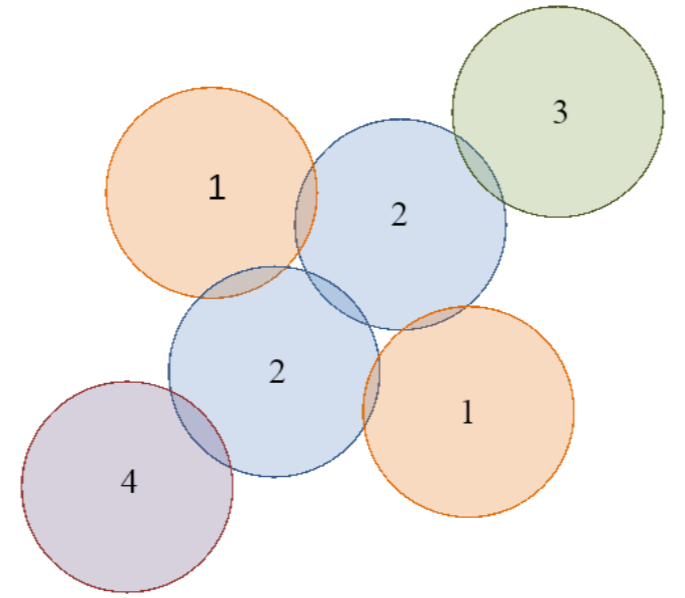


In [56]:
import numpy as np
import matplotlib.pyplot as plt

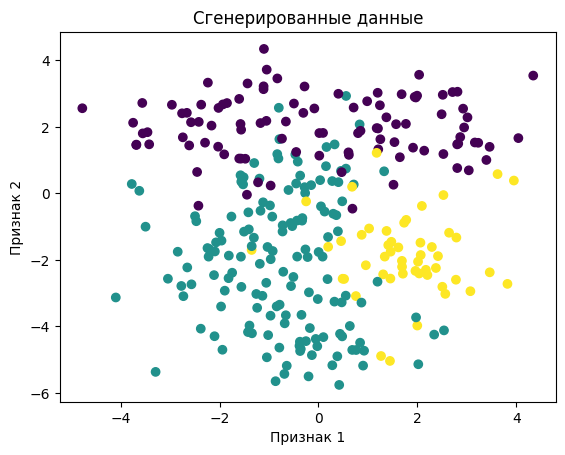

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры генерации данных
num_samples = 300
num_classes = 4
num_clusters = 6

# Задаем центры кластеров
centers = np.array([[0, 0],
                    [2, 2],
                    [-2, 2],
                    [2, -2],
                    [-2, -2],
                    [0, -4]])

# centers = np.random.rand(num_clusters, 2) * 10 - 5


# Генерируем данные с более похожим на нормальное распределение
data = []
labels = []
for _ in range(num_clusters):
    center = centers[_]
    class_label = np.random.randint(num_classes)
    cluster_data = np.random.multivariate_normal(center, np.eye(2), num_samples // num_clusters)
    data.extend(cluster_data)
    labels.extend([class_label] * (num_samples // num_clusters))

# for _ in range(num_clusters):
#     center = centers[_]
#     cov = np.random.rand(2, 2) * 0.5  # Матрица ковариации
#     cluster_data = np.random.multivariate_normal(center, cov, num_samples // num_clusters)
#     data.extend(cluster_data)
#     labels.extend([_] * (num_samples // num_clusters))
    
# Преобразуем в numpy массивы
data = np.array(data)
labels = np.array(labels)

# Визуализация данных
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title('Сгенерированные данные')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()


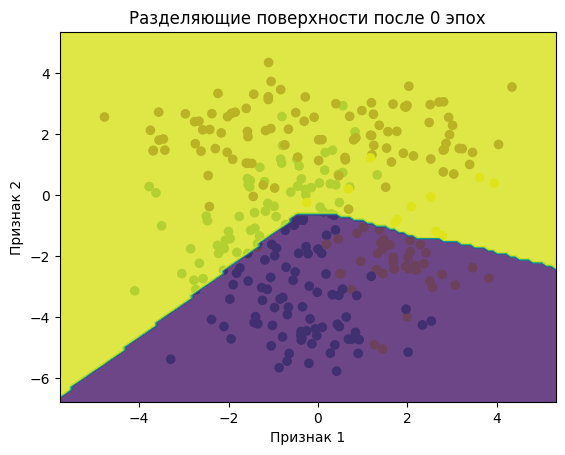

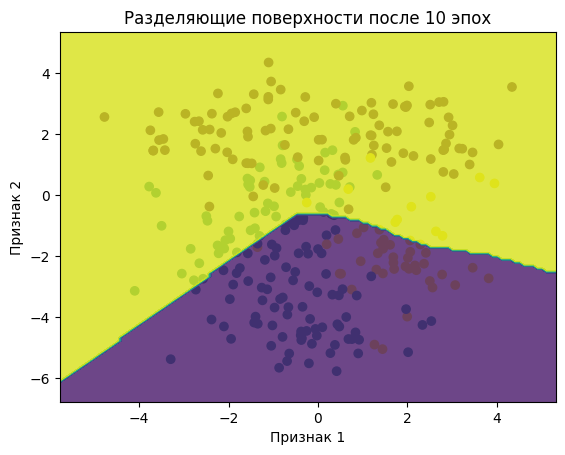

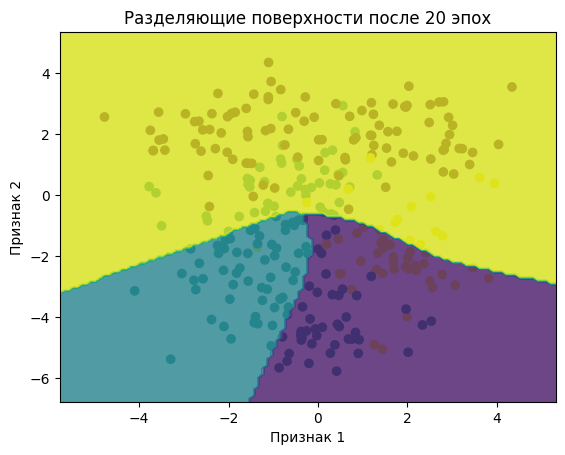

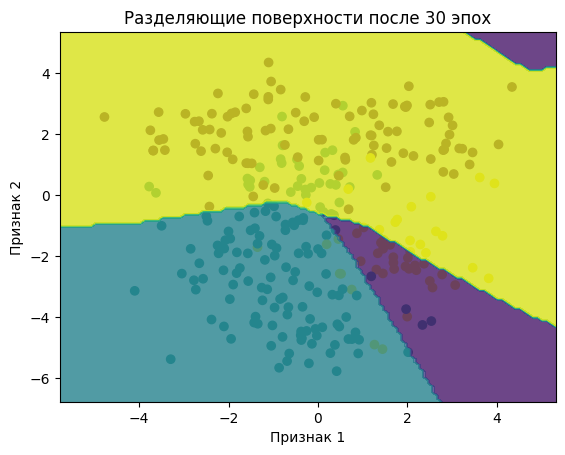

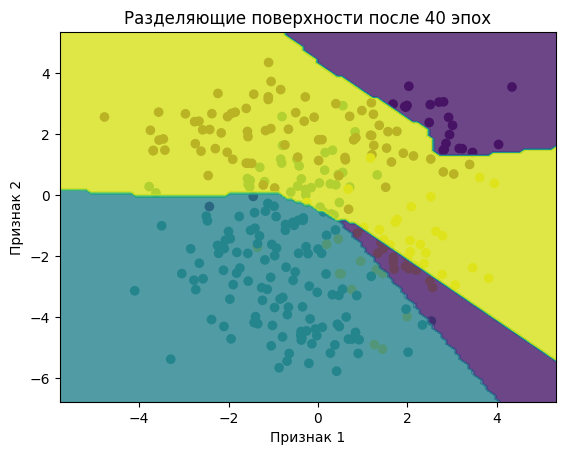

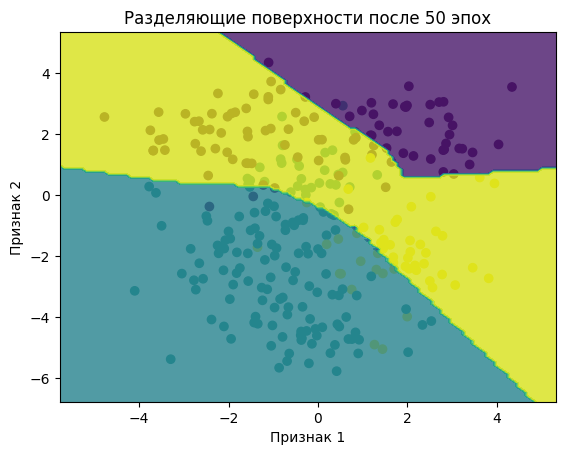

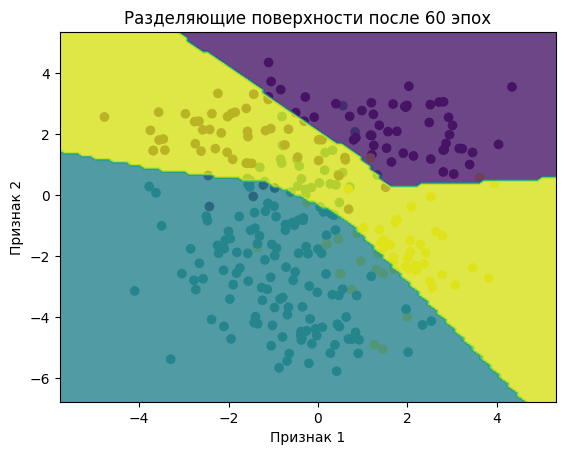

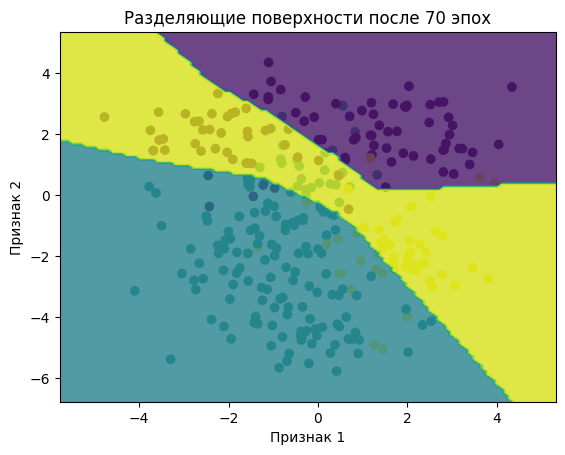

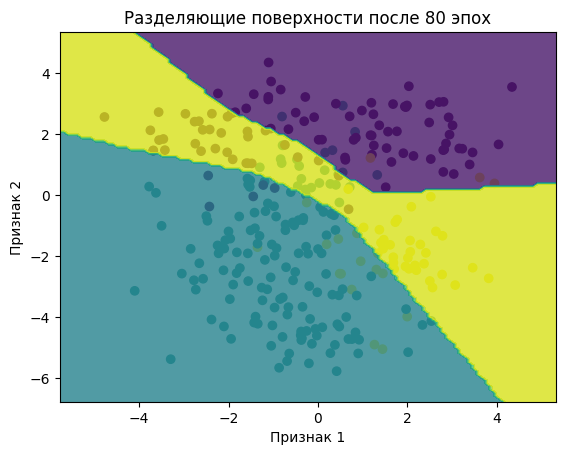

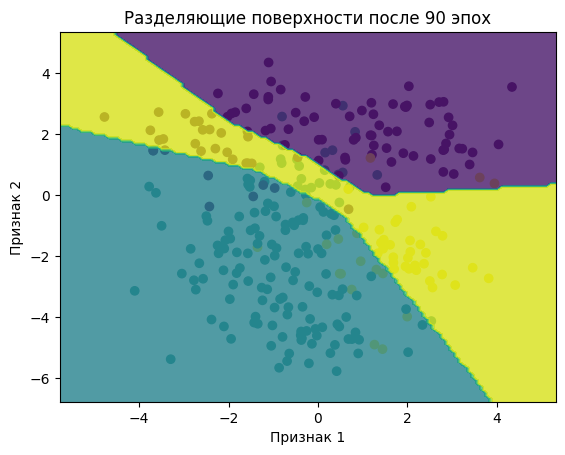

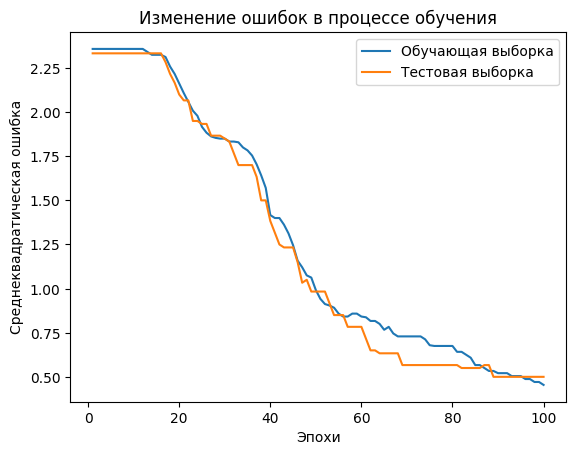

In [90]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Создаем и обучаем классификатор многослойного персептрона
classifier = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42)
train_errors = []  # Хранение ошибок на обучающей выборке
test_errors = []  # Хранение ошибок на тестовой выборке

for epoch in range(100):  # Производим 100 эпох обучения
    classifier.partial_fit(X_train, y_train, classes=np.unique(labels))
    train_pred = classifier.predict(X_train)
    train_error = mean_squared_error(y_train, train_pred)
    train_errors.append(train_error)
    test_pred = classifier.predict(X_test)
    test_error = mean_squared_error(y_test, test_pred)
    test_errors.append(test_error)
    
    if epoch % 10 == 0:  # Визуализация разделяющих поверхностей каждые 10 эпох
        plt.figure()
        plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
        x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
        y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
        plt.title('Разделяющие поверхности после {} эпох'.format(epoch))
        plt.xlabel('Признак 1')
        plt.ylabel('Признак 2')
        plt.show()
    
# Визуализация изменения среднеквадратических ошибок
epochs = range(1, 101)
plt.plot(epochs, train_errors, label='Обучающая выборка')
plt.plot(epochs, test_errors, label='Тестовая выборка')
plt.title('Изменение ошибок в процессе обучения')
plt.xlabel('Эпохи')
plt.ylabel('Среднеквадратическая ошибка')
plt.legend()
plt.show()

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Оценка метрик классификации
test_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred, average='weighted')
recall = recall_score(y_test, test_pred, average='weighted')
f1 = f1_score(y_test, test_pred, average='weighted')
confusion = confusion_matrix(y_test, test_pred)

print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1-score: {:.2f}'.format(f1))
print('Confusion matrix:\n', confusion)

Accuracy: 0.75
Precision: 0.78
Recall: 0.75
F1-score: 0.76
Confusion matrix:
 [[13  1  5]
 [ 2 27  3]
 [ 0  4  5]]


Введите количество новых данных: 1
Введите значение признака 1: 2
Введите значение признака 2: -2


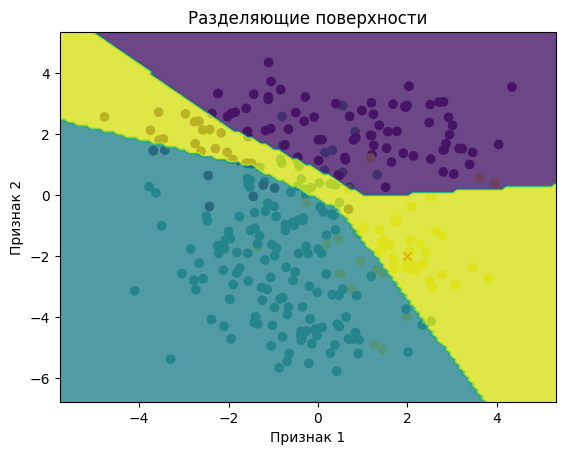

Новая точка [ 2. -2.] классифицирована как класс 3


In [99]:
# Ввод новых данных пользователем
new_data = []
num_new_samples = int(input("Введите количество новых данных: "))
for _ in range(num_new_samples):
    x = float(input("Введите значение признака 1: "))
    y = float(input("Введите значение признака 2: "))
    new_data.append([x, y])
new_data = np.array(new_data)

# Визуализация новых данных совместно с обучающей выборкой и разделяющими поверхностями
plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(new_data[:, 0], new_data[:, 1], c='red', marker='x')
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.title('Разделяющие поверхности')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

# Классификация новых данных
new_predictions = classifier.predict(new_data)

# Вывод результатов классификации новых данных
for i in range(num_new_samples):
    print(f"Новая точка {new_data[i]} классифицирована как класс {new_predictions[i]}")